In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math, scipy
from scipy import optimize

In [3]:
def spiral(e, display=False):
    # length of coords = 2/e+2
    coords = [[0,0], [1,0], [1,1], [0,1]]
    ns = [None]*int(2/e-2)
    coords.extend(ns)
    for i in range(4,len(coords)):
#         if i>=2/e+2:
#             coords=coords[:i]
#             plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')
#             break
        if i%4==0:
            coords[i] = [coords[i-1][0],coords[i-4][1]+e]
        elif i%4==1:
            coords[i] = [coords[i-4][0]-e,coords[i-1][1]]
        elif i%4==2:
            coords[i] = [coords[i-1][0],coords[i-4][1]-e]
        else:
            coords[i] = [coords[i-4][0]+e,coords[i-1][1]]
    if display==True:
        plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')
    return np.array([np.array(i) for i in coords])

In [4]:
coords = spiral(e=1/4)
# print(len(coords))

In [5]:
def fun(x, p=coords):
    part1 = sum([i**2 for i in x])
    part2 = 0
    for i in range(len(p) - 2):
        for j in range(i+2, len(p)):
#             print(i, j)
            vi = np.array([x[i*2], x[i*2+1]])
            vj = np.array([x[j*2], x[j*2+1]])
            den = (vi-vj)@(p[i]-p[j])-math.sqrt(sum([k**2 for k in p[j]-p[i]]))
            part2+=1/den
    return part1+part2

In [6]:
def generate_constraints(coords):
    # A is a m-by-2n matrix, where m is the number of constraints and n=|V| 
    A=[]
    n = len(coords)
    m = int(n*(n-1)/2)
    lb=[0]*m
    ub=[0]*m
    ind_m=0
    for i in range(n-1):
        for j in range(i+1,n):
            # indices of vix, viy, vjx, vjy
            ind_vix = i*2
            ind_viy = ind_vix+1
            ind_vjx = j*2
            ind_vjy = ind_vjx+1
            # pix, piy, pjx, pjy
            pix = coords[i][0]
            piy = coords[i][1]
            pjx = coords[j][0]
            pjy = coords[j][1]
            # row
            row=[0]*(2*n)
            row[ind_vix] = pix-pjx
            row[ind_viy] = piy-pjy
            row[ind_vjx] = pjx-pix
            row[ind_vjy] = pjy-piy
            if j-i!=1:
                lb[ind_m] = 1#e-10 #np.linalg.norm(coords[j]-coords[i])+2**(-10)
                ub[ind_m] = float('inf')
            ind_m+=1
            A.append(row)
    return np.array(A), lb, ub

In [21]:
import numpy as np
import math
from statistics import mean
import matplotlib.pyplot as plt

def polygon(n):
    points = np.random.rand(n,2)
    for i in range(n-1):
        for j in range(i+1,n):
            if points[i].all()==points[j].all():
                points[j] = np.random.rand(1,2)
    # reordering vertices
#     print(points)
    x_c = points[:,0]
    y_c = points[:,1]
    mean_x = mean(x_c)
    mean_y = mean(y_c)
    angles = []
    for i in range(len(points)):
        angle = math.atan2( (y_c[i]-mean_y),(x_c[i]-mean_x) )
        angles.append(angle)
    sort_index = np.argsort(np.array(angles))
    new_points = points[sort_index]
    return new_points
coords = polygon(200)

SolverError: Solver 'CPLEX' failed. Try another solver, or solve with verbose=True for more information.

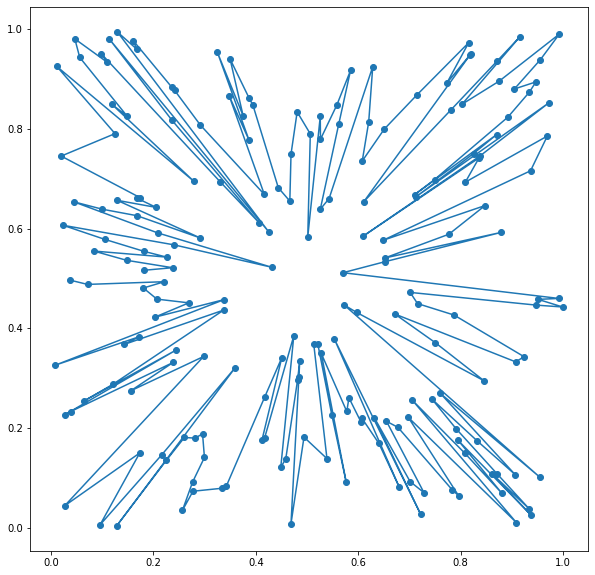

In [22]:
# objective_fn = cp.norm(x)**2 + 
# from cvxpy import *
import cvxpy as cp

plt.rcParams["figure.figsize"] = (10, 10)

# coords = spiral(e=1/5)
plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')
# print(len(coords))
q=0
for _ in range(5):
    x = cp.Variable(2*len(coords))
    p=coords
    part1 = cp.sum_squares(x)
    # part1 = sum([i**2 for i in x])
    # part1=0
    part2 = 0
    for i in range(len(p) - 2):
        for j in range(i+2, len(p)):
    #             print(i, j)
            vi = np.array([x[i*2], x[i*2+1]])
            vj = np.array([x[j*2], x[j*2+1]])
            part2a = (vi-vj)[0]*(p[i]-p[j])[0] + (vi-vj)[1]*(p[i]-p[j])[1]
            den = part2a - cp.norm(p[j]-p[i]) # math.sqrt(sum([k**2 for k in p[j]-p[i]]))
            part2+=den**(-1)
    fun=0# part1 #part2 + cp.sum_squares(x)

    A, lb, ub = generate_constraints(coords)

    constraints = [
        A@x <= ub,
        lb <= A@x,
        x[0] <= 0,
        x[0] >= 0,
        x[1] <= 0,
        x[1] >= 0,
        x[2] <= 0,
        x[2] >= 0,
        x[3] <= 0,
        x[3] >= 0,
    ]
    problem = cp.Problem(cp.Minimize(fun), constraints)
    problem.solve(solver= "CPLEX", verbose=False)
    for i in range(len(x.value)):
        coords[int(i/2)][i%2]=coords[int(i/2)][i%2]+(x.value[i]/1e6)
    # plot
    q+=1
#     if q%10==0:
    plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')
# solver= "CPLEX", 

KeyboardInterrupt: 

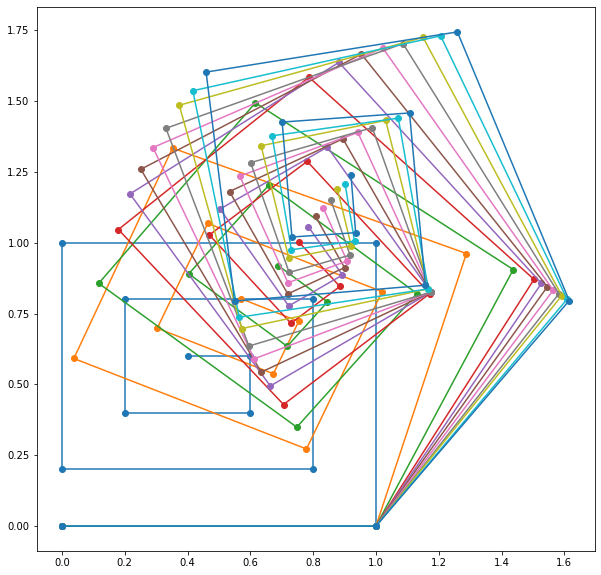

In [19]:
# objective_fn = cp.norm(x)**2 + 
# from cvxpy import *
import cvxpy as cp

plt.rcParams["figure.figsize"] = (10, 10)

coords = spiral(e=1/5)
plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')
# print(len(coords))
q=0
for _ in range(500):
    x = cp.Variable(2*len(coords))
    p=coords
    part1 = cp.sum_squares(x)
    # part1 = sum([i**2 for i in x])
    # part1=0
    part2 = 0
    for i in range(len(p) - 2):
        for j in range(i+2, len(p)):
    #             print(i, j)
            vi = np.array([x[i*2], x[i*2+1]])
            vj = np.array([x[j*2], x[j*2+1]])
            part2a = (vi-vj)[0]*(p[i]-p[j])[0] + (vi-vj)[1]*(p[i]-p[j])[1]
            den = part2a - cp.norm(p[j]-p[i]) # math.sqrt(sum([k**2 for k in p[j]-p[i]]))
            part2+=den**(-1)
    fun=0# part1 #part2 + cp.sum_squares(x)

    A, lb, ub = generate_constraints(coords)

    constraints = [
        A@x <= ub,
        lb <= A@x,
        x[0] <= 0,
        x[0] >= 0,
        x[1] <= 0,
        x[1] >= 0,
        x[2] <= 0,
        x[2] >= 0,
        x[3] <= 0,
        x[3] >= 0,
    ]
    problem = cp.Problem(cp.Minimize(fun), constraints)
    problem.solve(solver= "CPLEX", verbose=False)
    for i in range(len(x.value)):
        coords[int(i/2)][i%2]=coords[int(i/2)][i%2]+(x.value[i]/1e6)
    # plot
    q+=1
    if q%10==0:
        plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')
# solver= "CPLEX", 

In [60]:
coords

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00],
       [ 4.31969348e+20,  1.00000000e+00],
       [ 4.31969348e+20,  4.79965942e+20],
       [-4.74111600e+18,  4.79965942e+20],
       [-4.74111600e+18,  4.26700440e+19],
       [ 3.84030396e+20,  4.26700440e+19],
       [ 3.84030396e+20,  4.31450565e+20],
       [ 4.38463361e+19,  4.31450565e+20],
       [ 4.38463361e+19,  9.12663253e+19],
       [ 3.35432853e+20,  9.12663253e+19],
       [ 3.35432853e+20,  3.82852847e+20],
       [ 9.24440840e+19,  3.82852847e+20],
       [ 9.24440840e+19,  1.39864078e+20],
       [ 2.86835099e+20,  1.39864078e+20],
       [ 2.86835099e+20,  3.34255093e+20],
       [ 1.41041838e+20,  3.34255093e+20],
       [ 1.41041838e+20,  1.88461832e+20],
       [ 2.38237345e+20,  1.88461832e+20],
       [ 2.38237345e+20,  2.85657339e+20],
       [ 1.89639592e+20,  2.85657339e+20],
       [ 1.89639592e+20,  2.37059585e+20]])

In [63]:
x.value

In [12]:
np.linalg.norm(x.value)

1297.1599749067568

In [39]:
# import sympy
# sympy.Matrix(A)
# # A

In [40]:
# sympy.Matrix(ub)

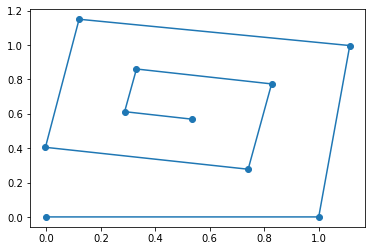

In [42]:
# coords = spiral(e=1/4)
for i in range(len(x.value)):
    coords[int(i/2)][i%2]=coords[int(i/2)][i%2]+x.value[i]/1e4
# plot
plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')

In [5]:
def plot_poly(coords):
    return plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')

In [83]:
def bounds_to_fix_bar(coords,v1=0,v2=1):
    bnds = [(None, None)]*(len(coords)*2)
    bnds[v1*2] = (0,0)
    bnds[v1*2+1] = (0,0)
    bnds[v2*2] = (0,0)
    bnds[v2*2+1] = (0,0)
    return bnds

In [8]:
# not used 
def calc_lengths(coords):
    lengths=[]
    for i in range(len(coords)-1):
        lengths.append(np.linalg.norm(coords[i] - coords[i+1]))
    return lengths

def length_correction(coords, lengths):
    for i in range(1, len(coords)-1):
        distorted_len = np.linalg.norm(coords[i] - coords[i+1])
        correct_len = lengths[i]
        correct_coord = coords[i] + (coords[i+1]-coords[i])*(correct_len/distorted_len)
        print(f'from {coords[i]} to {correct_coord}')
        diff = correct_coord - coords[i]
        coords[i] = correct_coord
        for j in range(i+1, len(coords)):
            coords[j]+=diff
    return coords

/home/huziling/.local/lib/python3.8/site-packages/scipy/optimize/_minimize.py:559: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


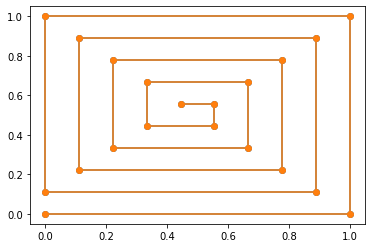

In [89]:
coords = spiral(e=1/9)
lengths = calc_lengths(coords)
# plot the original
plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')
for _ in range(1):
    # generate constraints with lb <= Ax <= ub
    A, lb, ub = generate_constraints(coords)
    constraint_general=scipy.optimize.LinearConstraint(A=A, lb=lb, ub=ub, keep_feasible=False)
    # bounds to fix an edge (currently the first edge but can be any edge)
    bnds = bounds_to_fix_bar(coords)
    # initial guess
    x0=np.zeros(A.shape[1])
    # optimization methods
#     m='Powell'
    m='Nelder-Mead'# (problematic)
    m='CG'
    # convex optimization
    result = scipy.optimize.minimize(fun, x0, method=m, constraints=constraint_general, bounds=bnds)
    # update coordinates (P)
    for i in range(len(result.x)):
        coords[int(i/2)][i%2]=coords[int(i/2)][i%2]+result.x[i]/50
    # plot
    plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')

In [ ]:
# Import packages.
import cvxpy as cp

# Define and solve the CVXPY problem.
n=2*len(coords)
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(c.T@x),
                 [A @ x <= b])
prob.solve()

In [86]:
result

   direc: array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])
     fun: -7.207223061761538e+16
 message: 'Optimization terminated successfully.'
    nfev: 8417
     nit: 5
  status: 0
 success: True
       x: array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  5.95668422e-02, -1.00141317e+00,  2.36068355e-01,
       -4.16814000e-05,  1.00000000e+00,  1.00003966e+00,  6.19404387e-02,
        1.01000001e+00,  4.03252234e-01, -1.27090692e-04, -1.57323121e-06,
        3.87514402e-02, -2.17327403e-04,  1.03947413e+00,  1.89550482e-03,
       -9.52647960e-04, -8.67171638e-06,  6.38556245e-02, -2.64399266e-03,
        1.45119969e+00,  1.54798726e-03,  1.05001768e+00, -1.21101279e-02,
       -9.55627231e-04, -5.64728610e-06, -8.01974496e-02, -1.62064543e-03,
  

In [87]:
np.linalg.norm(result.x)

3.3808264000658164

In [68]:
coords

[array([0, 0]),
 array([0, 1]),
 array([0.38610045, 0.25177275]),
 array([1, 0]),
 array([0, 0])]

<BarContainer object of 20 artists>

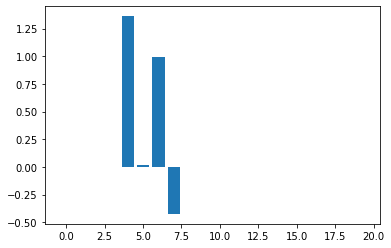

In [72]:
plt.bar(range(len(result.x)), result.x)

<ipython-input-63-a749387e6869>:10: RuntimeWarning: divide by zero encountered in double_scalars
  part2+=1/den


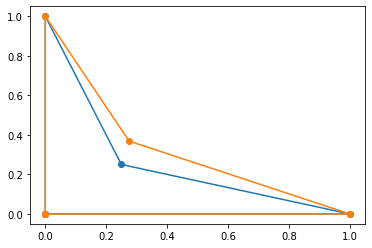

In [75]:
# coords = spiral(e=1/4)
# lengths = calc_lengths(coords)
p1=np.array([0,0])
p2=np.array([0,1])
p3=np.array([1/4,1/4])
p4=np.array([1,0])

# plot the original
coords=[p1,p2,p3,p4,p1]
# original spiral
plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')
for _ in range(1):
    # generate constraints with lb <= Ax <= ub
    A, lb, ub = generate_constraints(coords)
    constraint_general=scipy.optimize.LinearConstraint(A=A, lb=lb, ub=ub, keep_feasible=False)
    # bounds to fix an edge (currently the first edge but can be any edge)
    bnds = bounds_to_fix_bar(coords)
    # initial guess
    x0=np.zeros(A.shape[1])
    # optimization methods
#     m='Powell'
    m='Nelder-Mead'
    # convex optimization
    result = scipy.optimize.minimize(fun, x0, method=m, constraints=constraint_general, bounds=bnds)
    # update coordinates (P)
    for i in range(len(result.x)):
        coords[int(i/2)][i%2]=coords[int(i/2)][i%2]+result.x[i]/10
    # plot
    plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')

In [ ]:
##################################################
############## BELOW IS DEPRECATED ###############
##################################################

In [7]:
# DEPRECATED
def generate_constraints_fix_bar(coords, v1=0, v2=1):
    n = len(coords)
    m = int(n*(n-1)/2)
    A = np.zeros((m,2*n))
    A[0][v1*2] = 1   # v1x
    A[1][v1*2+1] = 1 # v1y
    A[2][v2*2] = 1   # v2x
    A[3][v2*2+1] = 1 # v2y
    lb, ub = [0]*4, [0]*4
    lb.extend([None]*(m-4))
    ub.extend([None]*(m-4))
    return A, lb, ub

IndexError: index 8 is out of bounds for axis 0 with size 8

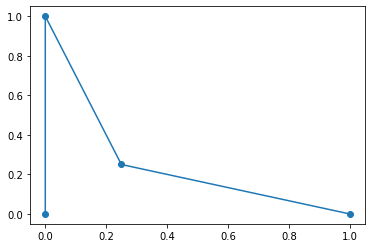

In [94]:
# eq=0
# ineq=0
# original spiral
plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')
for _ in range(5):
    e=1/4
    length = len(coords)
    dummy = int((2/e+1)/e)
    # dummy = length-1
#     print(length,dummy)
    ct=0
    A=[]
    for i in range(len(coords)):
        for j in range(i+1,len(coords)):
            row=[0]*(2*length+dummy)
            row[i*2]   = coords[i][0]-coords[j][0]
            row[i*2+1] = coords[i][1]-coords[j][1]
            row[j*2]   = coords[j][0]-coords[i][0]
            row[j*2+1]   = coords[j][1]-coords[i][1]
    #         if j-i!=1:
            if j-i==1:
    #             print(f'{i} and {j} are connected by an edge')
    #             print(f'(v{i}-v{j})(p{i}-p{j})=0')
    #             eq+=1
                row[2*length+ct]=1
    #             print(2*length+ct)
                ct+=1
            else:
    #             print(f'{i} and {j} are NOT connected by an edge')
    #             print(f'(v{i}-v{j})(p{i}-p{j})>0')
    #             ineq+=1
                pass
    #         print(row)
            A.append(row)
    A = np.array(A)
    constraint=scipy.optimize.LinearConstraint(A, np.zeros(A.shape[0]), np.zeros(A.shape[0]), keep_feasible=False)
    # x0=[random.uniform(0, 1) for _ in range(56)]
    x0=np.zeros(A.shape[1])
    m='Powell'
    result = scipy.optimize.minimize(fun, x0, method=m, constraints=constraint)
    for i in range(len(result.x[:20])):
        coords[int(i/2)][i%2]=coords[int(i/2)][i%2]+result.x[i]/100
#     print(int(i/2),i%2)
    plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')
    print(coords)

In [98]:
# p1=[0,0]
# p2=[0,1]
# p3=[1/4,1/4]
# p4=[1,0]
# coords=[p1,p2,p3,p4]
coords[1]-coords[9]

array([ 0.5, -0.5])

In [77]:
A.shape

(45, 56)

In [20]:
# coords=np.array([np.array(i) for i in coords])
# coords[2]@coords[8]

In [79]:
import scipy, random
from scipy import optimize
constraint=scipy.optimize.LinearConstraint(A, np.zeros(A.shape[0]), np.zeros(A.shape[0]), keep_feasible=False)
# x0=[random.uniform(0, 1) for _ in range(56)]
x0=np.zeros(A.shape[1])
m='Powell'

result = scipy.optimize.minimize(fun, x0, method=m, constraints=constraint)

In [80]:
result

   direc: array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])
     fun: -7364491130044.874
 message: 'Optimization terminated successfully.'
    nfev: 13443
     nit: 7
  status: 0
 success: True
       x: array([-1.04442220e+00, -2.86928245e-02,  1.02205129e+00, -3.46646157e-02,
        1.24354706e+00,  1.69103638e-01, -3.54893086e-01,  2.60456559e-03,
       -5.82978896e-05,  2.63899822e-06,  1.05474486e-04,  1.81777385e-06,
        3.39970551e-01,  1.12798834e-03,  1.04714971e+00, -9.56620314e-03,
        1.12158141e+00,  6.33935979e-03, -1.55847148e-03, -4.38893292e-06,
       -6.21260563e-08, -6.21260563e-08, -6.21260563e-08, -6.21260563e-08,
       -6.21260563e-08, -6.21260563e-08, -6.21260563e-08, -6.21260563e-08,
       -6.21260563e-08, -6.21260563e-08, -6.21260563e-08, -6.21260563e-08,
     

In [39]:
len(result.x[:40])

40

In [70]:
coords

array([[0.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 0.11111111],
       [0.88888889, 0.11111111],
       [0.88888889, 0.88888889],
       [0.11111111, 0.88888889],
       [0.11111111, 0.22222222],
       [0.77777778, 0.22222222],
       [0.77777778, 0.77777778],
       [0.22222222, 0.77777778],
       [0.22222222, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.44444444],
       [0.55555556, 0.44444444],
       [0.55555556, 0.55555556],
       [0.44444444, 0.55555556]])

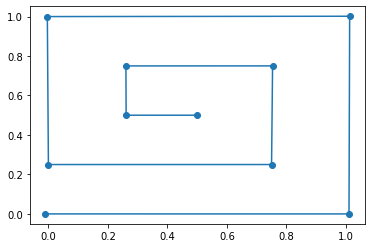

In [82]:
for i in range(len(result.x[:20])):
    coords[int(i/2)][i%2]=coords[int(i/2)][i%2]+result.x[i]/100
#     print(int(i/2),i%2)
plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')

In [81]:
import matplotlib.pyplot as plt
# plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')